# $\mathrm{CosmoFlow}$ : Single-Field Non-Local EFT

In this notebook (and the associated code), we implement the Cosmological Flow of a general single-field non-local theory of a scalar field in de Sitter. If one is not interested in non-analytic signals lying in soft limits of cosmological correlators (known as cosmological collider signals) arising from the exchange of a massive particle, all scalar correlators can be well described by the following effective theory for the low-energy mode : 

\begin{equation}
    \begin{aligned}
    \mathcal{L}/a^3 &= \frac{1}{2}\dot{\varphi} \,[1 + \rho^2\mathcal{D}^{-1}]\, \dot{\varphi} - \frac{c_s^2}{2}\,(\tilde{\partial}_i \varphi)^2 - \lambda_1 \,\dot{\varphi}\,(\tilde{\partial}_i \varphi)^2 - \lambda_2 \dot{\varphi}^3 - \lambda_3\, (\tilde{\partial}_i \varphi)^2\, \mathcal{D}^{-1} \dot{\varphi} - \lambda_4\, \dot{\varphi}^2\mathcal{D}^{-1}\dot{\varphi} - \lambda_5\, \dot{\varphi}[\mathcal{D}^{-1}\dot{\varphi}]^2 - \lambda_6\, [\mathcal{D}^{-1}\dot{\varphi}]^3\,,
    \end{aligned}
\end{equation}

where $\mathcal{D}^{-1} = (-\tilde{\partial}_i^2 + m^2)^{-1}$ is a non-local differential operator, $\tilde{\partial}_i = \partial_i/a$ with $a(t)$ being the scale factor, and $\lambda_i, \rho, m$ are coupling constants. We allow the field $\varphi$ to have an intrinsic speed of sound $c_s$. Such theory typically arises when a heavy field quadratically and cubically coupled to $\varphi$ has been integrated out. More details about this non-local theory (and partial UV completion) can be found in [Jazayeri et al. 2023](https://inspirehep.net/literature/2674409) and [Pinol et al. 2023](https://inspirehep.net/literature/2734774) (see also [Werth et al. 2023](https://inspirehep.net/literature/2628782) for an introduction to the Cosmological Flow). This non-local theory becomes local in the limit of a large mass $m$. This theory accuratly captures all "background" equilateralish signals. 

<div class="alert alert-block alert-info"> Please reach out to the developers if you have questions ! Your questions and feedback are very valuable to us. </div>

In [1]:
#Importing the standard Python packages
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

In [2]:
#Importing CosmoFlow
from background_inputs import background_inputs
from model import model
from solver import solver

In [3]:
#Function that turns on interactions adiabatically (numerical i\epsilon prescription) 
def adiabatic(N_load, DeltaN):
    return (np.tanh((N_load + DeltaN - 1)/0.1) + 1)/2

<div class="alert alert-block alert-warning"> Solving the flow equations need the numerical parameters n_back, DeltaN, Rtol, and Atol. Be sure to find balance between numerical precision (increasing n_back and rtol) and speed (decreasing DeltaN and rtol). The parameters set in this notebook were found to match both criteria. </div>

### Single Run for 2- and 3-pt Functions for a given Kinematic Configuration

In [6]:
n_back = 50000 #Number of points for the background
N_load = np.linspace(-10, 500, n_back) #Array on which the flow equations are solved
H_load = np.ones(n_back) #Hubble scale set to unity

#Number of efolds before horizon crossing
DeltaN = 5

#Squeezing parameter (k_long/k_short)
kappa = 1

#Quadratic theory
cs_load   = 1*np.ones(n_back)
m_load    = 1*np.ones(n_back)
rho_load  = 10*np.ones(n_back) * adiabatic(N_load, DeltaN)

#Cubic theory
lambda1_load = 1*np.ones(n_back) * adiabatic(N_load, DeltaN)
lambda2_load = 0*np.ones(n_back) * adiabatic(N_load, DeltaN)
lambda3_load = 0*np.ones(n_back) * adiabatic(N_load, DeltaN)
lambda4_load = 0*np.ones(n_back) * adiabatic(N_load, DeltaN)
lambda5_load = 0*np.ones(n_back) * adiabatic(N_load, DeltaN)
lambda6_load = 0*np.ones(n_back) * adiabatic(N_load, DeltaN)

#Setting up the flow equations
background = background_inputs(N_load, H_load, cs_load, m_load, rho_load, lambda1_load, lambda2_load, lambda3_load, lambda4_load, lambda5_load, lambda6_load)
interpolated = background.output()

#Numerical parameters for the flow equations
Nspan = np.linspace(-10, 20, 500)
Rtol, Atol = [1e-5, 1e-5, 1e-5], [1e-80, 1e-80, 1e-80]
mdl = model(N = Nspan, interpolated = interpolated)

#Kinematic configuration
N_exit = 0
kt = mdl.k_mode(N_exit)
k1, k2, k3 = kt/kappa, kt/kappa, kt

#Solving flow equations
Ni, Nf = N_exit - DeltaN, 20 # Sets initial and final efolds for transport equation integration
N = np.linspace(Ni, Nf, 1000)
s = solver(Nspan = N, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    

### Display Cosmological Flow of all 2- and 3-pt Functions

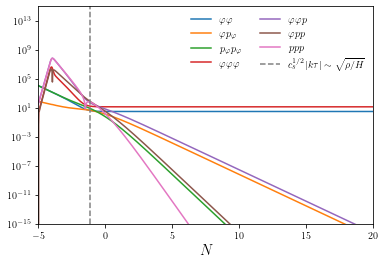

In [7]:
# Two-point functions

plt.semilogy(N, np.absolute(f[0][0, 0]), label = "$\\varphi \\varphi$")
plt.semilogy(N, np.absolute(f[0][0, 1]), label = "$\\varphi p_{\\varphi}$")
plt.semilogy(N, np.absolute(f[0][1, 1]), label = "$p_{\\varphi} p_{\\varphi}$")

#Three-point functions

plt.semilogy(N, np.absolute(f[6][0, 0, 0]), label = "$\\varphi \\varphi \\varphi$")
plt.semilogy(N, np.absolute(f[6][0, 0, 1]), label = "$\\varphi \\varphi p$")
plt.semilogy(N, np.absolute(f[6][0, 1, 1]), label = "$\\varphi p p$")
plt.semilogy(N, np.absolute(f[6][1, 1, 1]), label = "$p p p$")


plt.xlabel("$N$", fontsize = 15)
plt.ylim(1e-15, 1e15)
plt.xlim(N[0], N[-1])

if rho_load[-1] < m_load[-1]: #weak mixing
    plt.axvline(x = np.log(cs_load[0]*kt/H_load[-1]), ls = "--", color = "grey", label = "$c_s |k\\tau| \sim 1$")
if rho_load[-1] > m_load[-1]: #strong mixing
    plt.axvline(x = np.log(kt/H_load[-1]/np.sqrt(rho_load[-1]/cs_load[0])), ls = "--", color = "grey", label = "$c_s^{1/2}|k\\tau| \sim \sqrt{\\rho/H}$")

plt.legend(frameon = False, ncol = 2)
plt.grid(False)

- The module $\mathrm{squeezed.py}$ contains the function that evaluates the shape function (as defined in [Pinol et al. 2023](https://inspirehep.net/literature/2734774) Eq.(6.1) for the field $\varphi$), for a given array $\kappa$ ($=k_{\text{long}}/k_{\text{short}}$) in the isosceles-triangle configuration. 

- The module $\mathrm{SqueezedRun.py}$ is the code to execute once the theory and the numerical paramaters in $\mathrm{squeezed.py}$ have been selected. Careful, such run is very long !

- The module $\mathrm{mpi\_main.py}$ enables to parallelise the code when scanning the soft limit of cosmological correlators. Use the command line >mpiexec -n # python mpi_main.py to execute the code, where # is the number of cores